In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/Users/purzelrakete/src/github.com/feldberlin/wavenet


In [19]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import IPython.display as ipd

from wavenet import model, utils, datasets, viz, audio

# Stereo Impulse Dataset

This dataset contains random synthetic sounds designed to be easy to inspect. The first sample is randomly drawn from a binomial distribution, and the following samples are zero.

In [20]:
X = datasets.StereoImpulse(2**14, 5, model.HParams(), (0.3, 0.7))

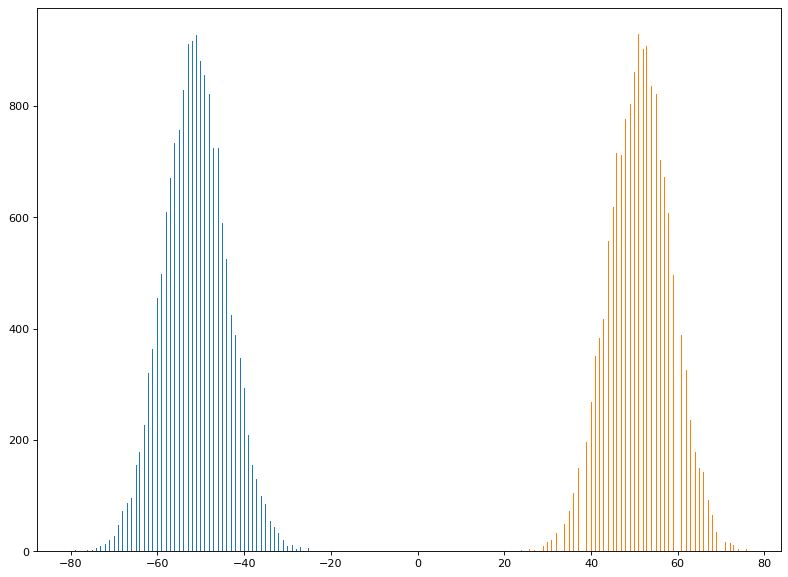

In [21]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(X[:, 0, 0][1].numpy(), bins=256);
plt.hist(X[:, 1, 0][1].numpy(), bins=256);

# Track Dataset

A dataset of slices taken from a single track.

In [45]:
p = model.HParams()
X = datasets.Track('fixtures/short.wav', p)
y = X[:][1]

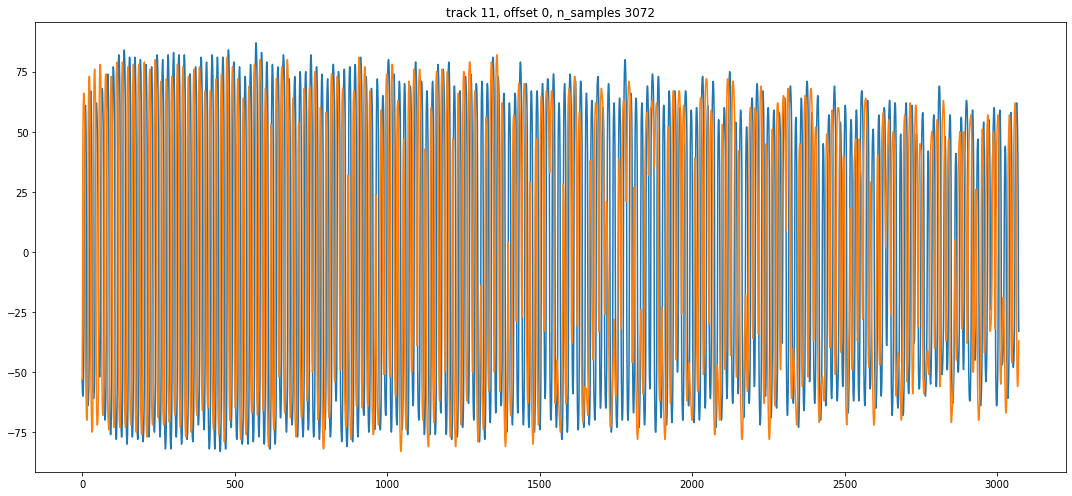

In [46]:
track_i = viz.plot_track(y, n_samples=p.receptive_field_size())

In [71]:
y = X[track_i][1][:p.receptive_field_size()]
y = audio.mu_expand(y.numpy(), p)
ipd.Audio(y, rate=p.sampling_rate)

# Sines Dataset

A dataset of sine waves.

In [42]:
p = model.HParams()
X, Y = datasets.to_tensor(datasets.Sines(4, 1, p))

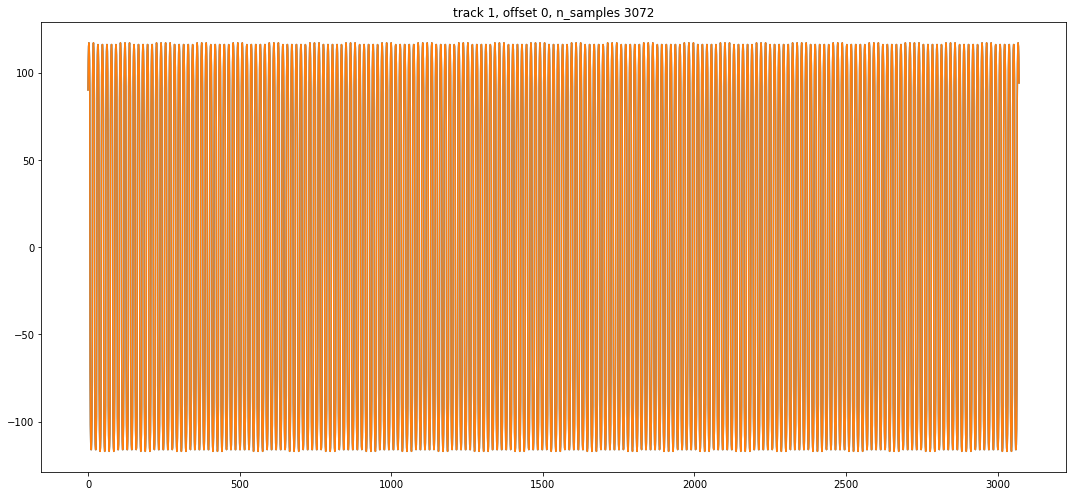

In [43]:
track_i = viz.plot_track(Y, n_samples=p.receptive_field_size())

In [44]:
ipd.Audio(Y[track_i], rate=p.sampling_rate)